In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from numpy.random import normal

from muldoon.met_timeseries import MetTimeseries
from muldoon.utils import modified_lorentzian

In [51]:
# Create time-series
time = np.linspace(-10, 10, 1000)
baseline = 0.
slope = 1.
t0 = 0.
DeltaP = 1.
Gamma = 0.5
profile = modified_lorentzian(time, baseline, slope, t0, DeltaP, Gamma) + normal(scale=slope/20., size=len(time))
mt = MetTimeseries(time, profile)

0.053591706314163816
True


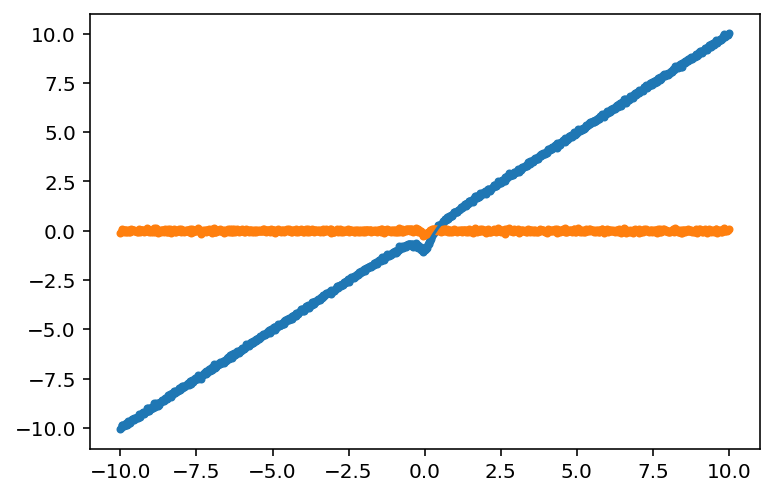

In [52]:
# Detrend
window_size = Gamma
detrended_pressure = mt.detrend_pressure_timeseries(window_size)
print(np.std(mt.detrended_pressure))
print(np.isclose(np.std(mt.detrended_pressure), 0.1, atol=0.1))

plt.scatter(mt.time, mt.pressure, marker='.')
plt.scatter(mt.time, mt.detrended_pressure, marker='.')
plt.plot(mt.time, mt.pressure_trend)

In [44]:
# Test time-series write-out
write_str = mt.write_out_detrended_timeseries(test_mode=True)
print(write_str);

# time, pressure
-10, -0.0553887
-9.97998, -0.142628
-9.95996, -0.0903878
-9.93994, 0.0860124
-9.91992, -0.00771327
-9.8999, -0.139231
-9.87988, 0.0473844
-9.85986, 0.0613308
-9.83984, 0.0379163
-9.81982, 0.0325609
-9.7998, 0.186938
-9.77978, -0.0475663
-9.75976, -0.0203983
-9.73974, -0.0364297
-9.71972, -0.182277
-9.6997, -0.0408863
-9.67968, -0.119601
-9.65966, 0.061577
-9.63964, -0.0730935
-9.61962, -0.0488527
-9.5996, 0.140239
-9.57958, 0.0124358
-9.55956, 0.0520091
-9.53954, -0.120981
-9.51952, -0.06468
-9.4995, 0.214693
-9.47948, 0.0459073
-9.45946, -0.0172309
-9.43944, 0.141533
-9.41942, 0.0156786
-9.3994, -0.0347705
-9.37938, -0.0620238
-9.35936, -0.143968
-9.33934, -0.111422
-9.31932, -0.0200299
-9.2993, 0.109007
-9.27928, 0.112672
-9.25926, -0.0953773
-9.23924, -0.0177868
-9.21922, -0.252846
-9.1992, 0.0364722
-9.17918, -0.0231904
-9.15916, 0.0431829
-9.13914, 0.0454744
-9.11912, 0.017023
-9.0991, -0.0596431
-9.07908, -0.0801658
-9.05906, 0.014937
-9.03904, -0.0240049
-9.0190

In [18]:
from scipy.stats import mode
print(mt.time[1:] - mt.time[0:-1])
print(mode(mt.time[1:] - mt.time[0:-1]).mode[0])

[0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.0200

8.899740097821205 0.1501501501501501 0.040040040040040026
0.1501501501501501


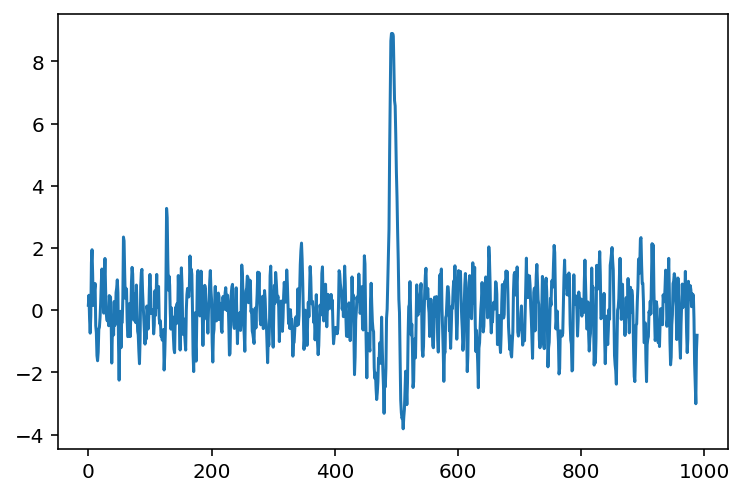

In [54]:
# plt.plot(mt.time, profile)
conv = mt.apply_lorentzian_matched_filter(2.*mt.sampling, 1./np.pi)
mx_ind = np.argmax(mt.convolution)

print(mt.convolution[mx_ind], np.abs(mt.time[mx_ind]), 2.*mt.sampling)
# plt.plot(mt.time, mt.convolution)
# plt.plot(mt.time, profile)
plt.plot(mt.convolution)
# Make sure convolution returns a strong peak at the right time
print((np.abs(mt.time[mx_ind])))

[492 127  57 897 346 917 756 650 850]


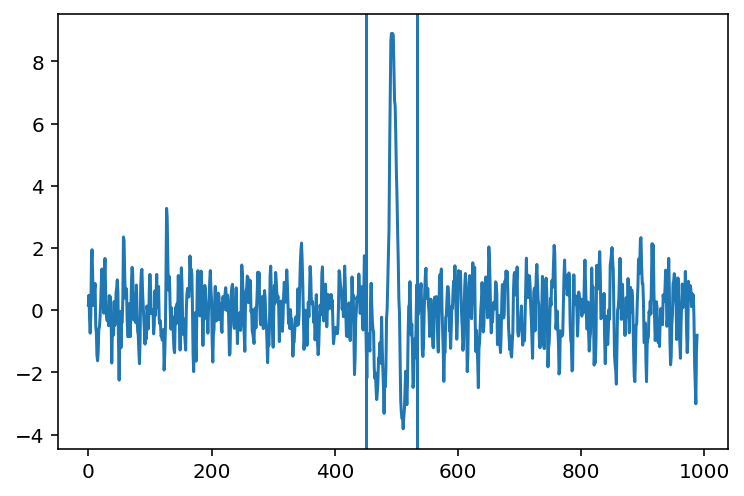

In [59]:
# Test find_vortices
peak_indices, peak_widths = mt.find_vortices(detection_threshold=2)
plt.plot(mt.convolution)
plt.axvline(peak_indices[0] - 3.*peak_widths[0])
plt.axvline(peak_indices[0] + 3.*peak_widths[0])

# Make sure the max peak in the convolution is the right one
assert(mt.time[peak_indices[0]] < Gamma)

453 531
492 13
453.0 531.0


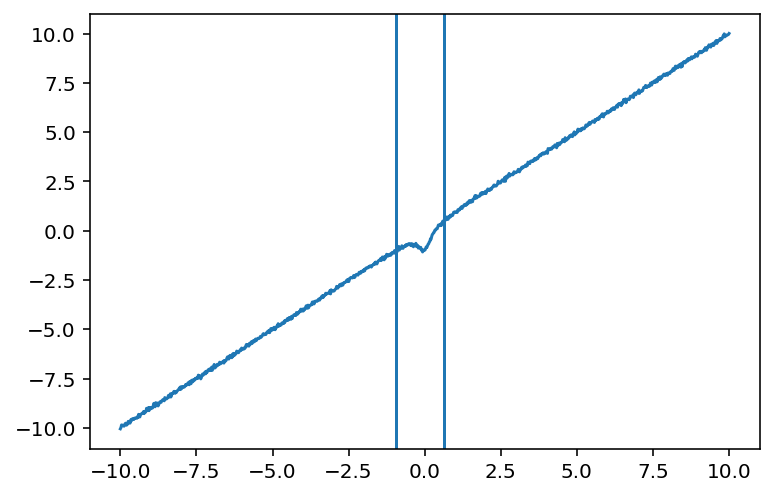

In [77]:
# Test find_vortices
peak_indices, peak_widths = mt.find_vortices(detection_threshold=7)
plt.plot(mt.time, mt.pressure)
print(mt.peak_indices[0], int(mt.peak_widths[0]))
plt.axvline(mt.time[peak_indices[0] - 3*int(mt.peak_widths[0])])
plt.axvline(mt.time[peak_indices[0] + 3*int(mt.peak_widths[0])])
print(mt.peak_indices[0] - 6/2*int(mt.peak_widths[0]), 
      mt.peak_indices[0] + 6/2*int(mt.peak_widths[0]))

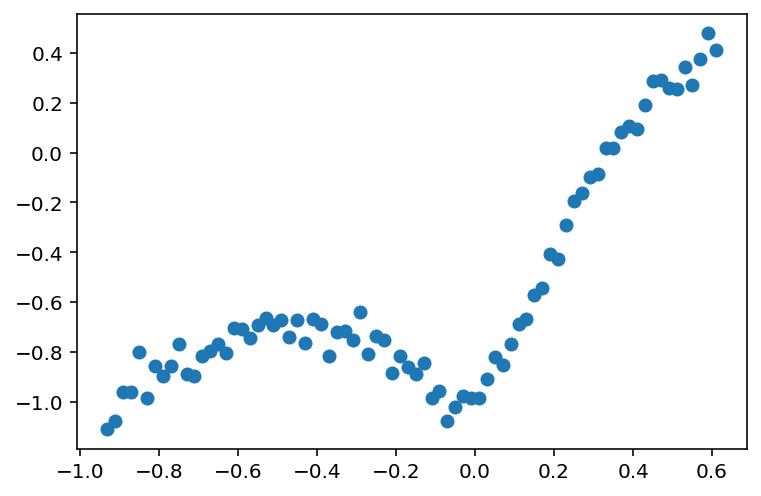

In [79]:
plt.scatter(mt.vortices[0]["time"], mt.vortices[0]["pressure"])

ValueError: x and y must have same first dimension, but have shapes (1000,) and (989,)

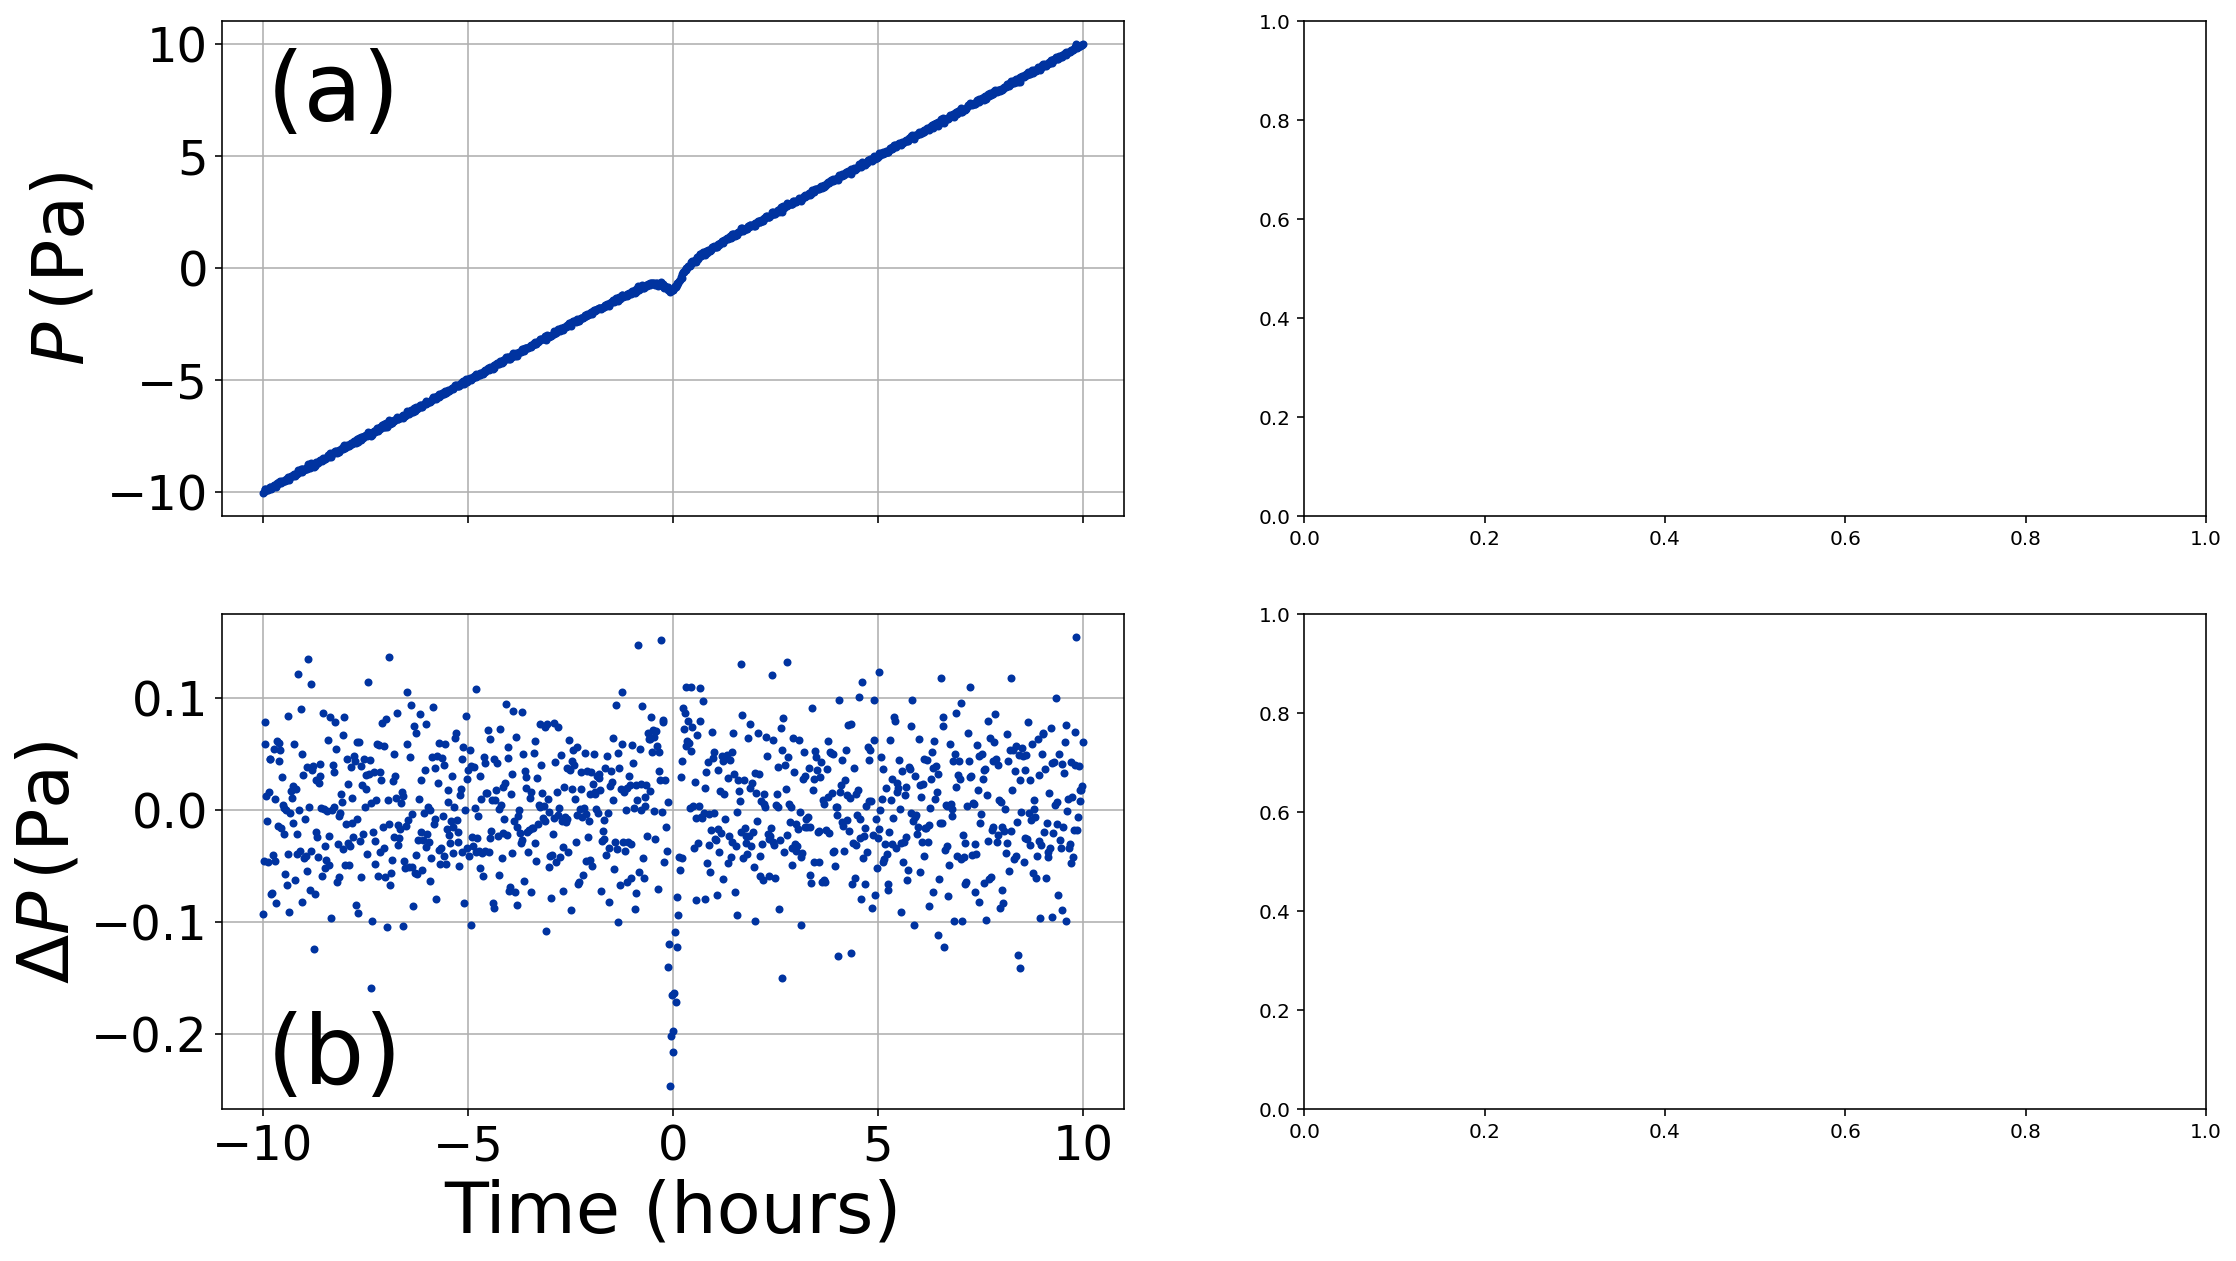

In [62]:
mt.make_conditioned_data_figure();